<a href="https://colab.research.google.com/github/GeorgievskaEmilija/Data-Science-Lab-Exercises/blob/main/183044_Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to try different clustering algorithams on simple Iris Species dataset.

You need to report for each algorithm the clustering evaluation metrics into a table.</font>


<font color = 'Orange' size = 4 > Dataset </font>

<font color = 'Orange' size = 3>
The Dataset for Iris Species is public available on kaggle: https://www.kaggle.com/uciml/iris and also you have the code below for the dataset as part of  sklearn.datasets.
</font>
<ul>
<font color = 'Orange' size = 3>
Clustering algorithms

<li>K-Means Clustering</li>
<li>Agglomerative Clustering</li> 
<li>Affinity propagation Clustering</li> 
<li>Spectral Clustering</li> 
<li>DBSCAN Clustering</li>
</ul>
</font>

<ul>
<font color = 'Orange' size = 3>
Clustering evaluation metrics

<li>ARI - Adjusted Rand index</li>
<li>AMI - Adjusted mutual information</li> 
<li>Homogenity</li> 
<li>Completeness</li> 
<li>V-measure</li>
</ul>
</font>

<font color = 'Orange' size = 3>
Choose the best clustering algorithm from the table and make visualization of the genereted clusters. 
For the visualization first you need to make dimensionality reduction (PCA) on X data into 2D data and then use your best clustering algorithm for cluster prediction.
</font>



In [ ]:
from sklearn import datasets

data = datasets.load_iris()
X, y = data.data, data.target

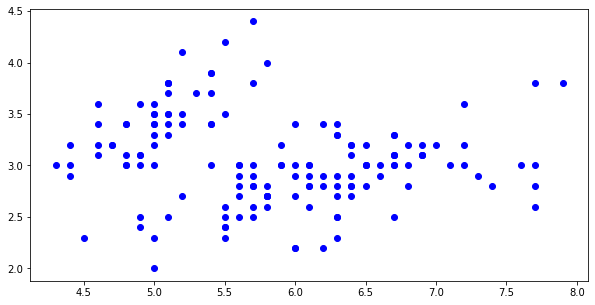

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(X[:,0], X[:,1], 'bo')

In [ ]:
from sklearn import metrics
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering,DBSCAN

algoritmi = []
algoritmi.append(KMeans(n_clusters=10, random_state=2))
algoritmi.append(AffinityPropagation())
algoritmi.append(SpectralClustering(n_clusters=10, random_state=1, affinity='nearest_neighbors'))
algoritmi.append(AgglomerativeClustering(n_clusters=10))
algoritmi.append(DBSCAN())

data = []
for algoritam in algoritmi:
    algoritam.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algoritam.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algoritam.labels_,average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algoritam.labels_),
        'Completeness': metrics.completeness_score(y, algoritam.labels_),
        'V-measure': metrics.v_measure_score(y, algoritam.labels_)}))



/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [ ]:
rezultati = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity', 'Completeness', 'V-measure'],
                                   index=['K-means', 'Affinity','Spectral', 'Agglomerative','DBSCAN'])
rezultati

,ARI,AMI,Homogenity,Completeness,V-measure
K-means,0.404263,0.610535,0.925560,0.473583,0.626569
Affinity,0.481172,0.659933,0.914941,0.527822,0.669446
Spectral,0.322857,0.573970,0.906382,0.437467,0.590114
Agglomerative,0.342231,0.547030,0.851754,0.422575,0.564893
DBSCAN,0.520619,0.598995,0.559946,0.656558,0.604416


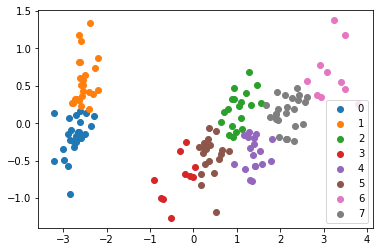

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns


pca = PCA(2)
newData = pca.fit_transform(X)

best = algoritmi[1] #affiniti
label = best.fit_predict(newData)
u_labels = np.unique(label)
labels = best.labels_

for lab in u_labels:
    plt.scatter(newData[label == lab , 0] , newData[label == lab , 1] , label = lab)
plt.legend()
plt.show()